In [9]:
from Geometry.Device import Device
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
hall = Device.open_file('wcte_bldg157.geo')
wcte = hall.wcds[0]

In [5]:
# Compare the design and as-built locations ('est' is the as-built locations estimated from surveys):
# The locations are reported in the top level container (the "hall")

sum_dist = 0.
n = 0
for mpmt in wcte.mpmts:
    if getattr(mpmt, 'place_est', None) is not None:
        design_loc = np.array(mpmt.get_placement('design')['location'])
        est_loc = np.array(mpmt.get_placement('est')['location'])
        displacement = est_loc - design_loc
    
        sum_dist += np.sqrt(np.dot(displacement, displacement))
        n += 1
    
mean_dist = sum_dist/n
print(f'Mean displacement: {mean_dist:.2f} mm')    

Mean displacement: 12.04 mm


In [12]:
# Compare distances between random PMTs

i_test = 0
diffs = []

while i_test < 10000:
    mpmt1 = wcte.mpmts[np.random.randint(0, len(wcte.mpmts))]
    mpmt2 = wcte.mpmts[np.random.randint(0, len(wcte.mpmts))]
    if getattr(mpmt1, 'place_est', None) is None or getattr(mpmt2, 'place_est', None) is None:
        continue
    pmt1 = mpmt1.pmts[np.random.randint(0, len(mpmt1.pmts))]
    pmt2 = mpmt2.pmts[np.random.randint(0, len(mpmt2.pmts))]
    
    design_loc1 = np.array(pmt1.get_placement('design')['location'])
    est_loc1 = np.array(pmt1.get_placement('est')['location'])
    
    design_loc2 = np.array(pmt2.get_placement('design')['location'])
    est_loc2 = np.array(pmt2.get_placement('est')['location'])
    
    design_displacement = design_loc2 - design_loc1
    est_displacement = est_loc2 - est_loc1
    
    design_dist = np.sqrt(np.dot(design_displacement, design_displacement))
    est_dist = np.sqrt(np.dot(est_displacement, est_displacement))

    diffs.append(est_dist - design_dist)
    
    if i_test < 10:
        print(f'Distance between PMTs {mpmt1.name}-{pmt1.name} and {mpmt2.name}-{pmt2.name}: Design: {design_dist:.2f} mm, As built: {est_dist:.2f} mm')
    i_test += 1

print(f'Mean difference: {np.mean(diffs):.2f} mm, standard deviation: {np.std(diffs):.2f} mm')


Distance between PMTs 29-3 and 76-12: Design: 1814.27 mm, As built: 1815.67 mm
Distance between PMTs 69-14 and 42-13: Design: 2771.35 mm, As built: 2759.42 mm
Distance between PMTs 51-18 and 76-10: Design: 3284.18 mm, As built: 3273.94 mm
Distance between PMTs 101-10 and 8-5: Design: 3215.56 mm, As built: 3215.62 mm
Distance between PMTs 37-14 and 18-4: Design: 2234.28 mm, As built: 2227.51 mm
Distance between PMTs 94-18 and 15-10: Design: 3607.20 mm, As built: 3594.23 mm
Distance between PMTs 18-18 and 97-4: Design: 3488.78 mm, As built: 3486.26 mm
Distance between PMTs 25-6 and 35-12: Design: 2699.81 mm, As built: 2692.08 mm
Distance between PMTs 22-5 and 36-14: Design: 1052.23 mm, As built: 1048.52 mm
Distance between PMTs 62-0 and 34-17: Design: 2435.71 mm, As built: 2427.50 mm
Mean difference: -7.20 mm, standard deviation: 5.97 mm


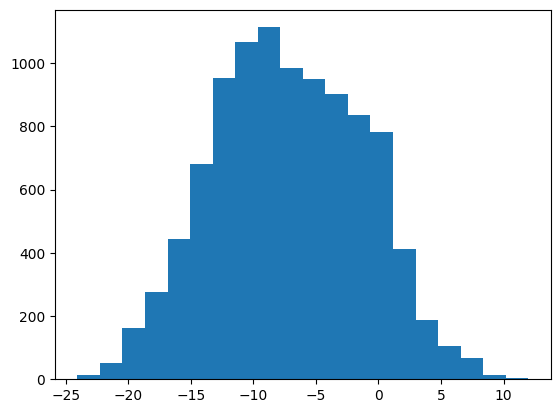

In [13]:
plt.hist(diffs, bins=20)
plt.show()

In [17]:
# Check mean locations for two rows of PMTs in the barrel

for i_group, mpmt_group in enumerate([[38,39,40,41,42,43,44,46,47,48,49,50,51,52],range(53,69)]):
    for place_info in ['design','est']:        
        sum_loc = np.array([0.,0.,0.])
    
        for i_mpmt in mpmt_group:
            p = wcte.mpmts[i_mpmt].get_placement(place_info,device_for_coordinate_system=hall)
            sum_loc = np.add(sum_loc,p['location'])
            
        mean_location = sum_loc/14.
        print(f'Row {i_group+2} mean location ({place_info}): [{mean_location[0]:.2f}, {mean_location[1]:.2f}, {mean_location[2]:.2f}] mm')

Row 2 mean location (design): [0.00, 0.00, -0.00] mm
Row 2 mean location (est): [0.00, -0.00, -0.00] mm
Row 3 mean location (design): [-0.00, 662.86, 0.00] mm
Row 3 mean location (est): [-0.14, 662.34, 4.36] mm
